In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.gridspec as gs
duration = 2.3 # [T] = ms -> [rate] = kHz


<ipython-input-1-4713b9d790d7>:2: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.pyplot as plt


In [2]:
points_storage = np.load("points_validation.npy")
rates_storage = np.load("rates_validation.npy")
weights_hidden_storage = np.load("weights_hidden.npy")
weights_out_storage = np.load("weights_out.npy")
bias_storage = np.load("bias.npy")
# convert rates to Hz
rates_storage /= duration

learning_steps = rates_storage.shape[0]
n_steps = rates_storage.shape[1]
n_nrns = rates_storage.shape[2]
accuracy = np.zeros(learning_steps)
target = {1: 75/duration,
          2: 215/duration}
VMAX = 255/duration
VMIN = 0/duration
    
error = np.zeros((learning_steps, n_steps))
targets = np.zeros((learning_steps, n_steps))

## Overview of Model Parameters

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


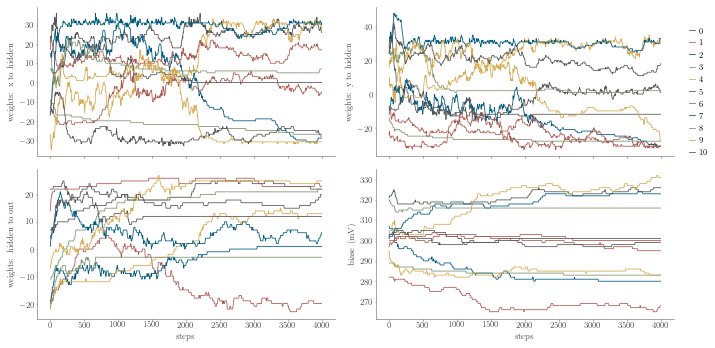

In [30]:
n_h_nrns = 11
n_nrns = 12
real_epochs = np.array(range(learning_steps))*5
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,5), sharex=True)
axes = axes.flatten()
axes[0].plot(real_epochs, weights_hidden_storage[:,0,:])
axes[1].plot(real_epochs, weights_hidden_storage[:,1,:])
axes[2].plot(real_epochs, weights_out_storage)
axes[3].plot(real_epochs, bias_storage)
axes[0].set_ylabel("weights: x to hidden")
#axes[0].legend(list(range(n_h_nrns)), fontsize=5)
axes[1].set_ylabel("weights: y to hidden")
axes[2].set_xlabel("steps")
#axes[1].legend(list(range(n_h_nrns)), fontsize=5)
axes[2].set_ylabel("weights: hidden to out")
axes[1].legend(list(range(n_h_nrns)), fontsize=8, loc=(1.05,0))
axes[3].set_ylabel("biase (mV)")
axes[3].set_xlabel("steps")
plt.subplots_adjust(hspace=0.15)
plt.tight_layout()
#axes[3].legend(list(range(n_nrns)), fontsize=5)
plt.savefig("model_parameters.png", transparent=True)

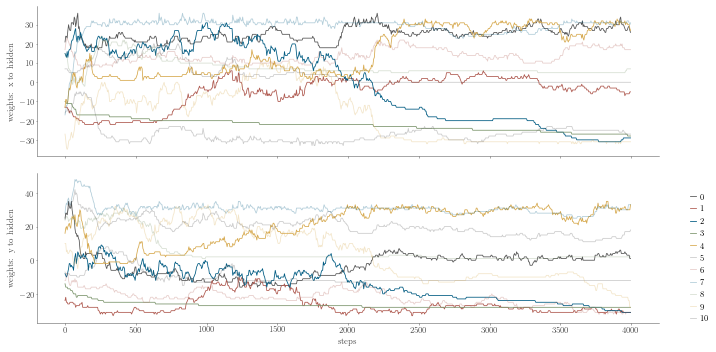

In [31]:
n_h_nrns = 11
n_nrns = 12
real_epochs = np.array(range(learning_steps))*5
alpha = 0.3
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True)
axes = axes.flatten()

axes[0].plot(real_epochs, weights_hidden_storage[:,0,:5])
axes[0].plot(real_epochs, weights_hidden_storage[:,0,5:], alpha = alpha)
axes[0].set_ylabel("weights: x to hidden")

axes[1].plot(real_epochs, weights_hidden_storage[:,1,:5])
axes[1].plot(real_epochs, weights_hidden_storage[:,1,5:], alpha = alpha)

axes[1].set_xlabel("steps")

#axes[2].plot(real_epochs, weights_out_storage)
#axes[3].plot(real_epochs, bias_storage)
#axes[0].legend(list(range(n_h_nrns)), fontsize=5)
axes[1].set_ylabel("weights: y to hidden")
#axes[2].set_xlabel("steps")
#axes[1].legend(list(range(n_h_nrns)), fontsize=5)
#axes[2].set_ylabel("weights: hidden to out")
axes[1].legend(list(range(n_h_nrns)), fontsize=8, loc=(1.05,0))
#axes[3].set_ylabel("biase (mV)")
#axes[3].set_xlabel("steps")
plt.subplots_adjust(hspace=0.15)
plt.tight_layout()
#axes[3].legend(list(range(n_nrns)), fontsize=5)
plt.savefig("model_parameters.png", transparent=True)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


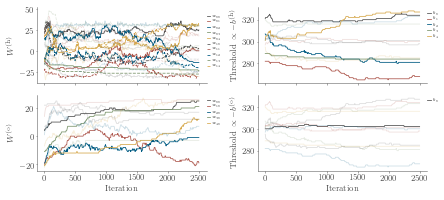

In [34]:
n = 2500//5

real_epochs = np.array(range(n))*5
alpha = 0.2
fs = 4
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,3), sharex=True)
wh_legend_labels = ["$w_{%s%s}$" % (i,j) for i in range(2) for j in range(5)]
wo_legend_labels = ["$w_{%s%s}$" % (i,j) for i in range(5) for j in range(1)]
bh_legend_labels = ["$b_%s$" % i for i in range(5)]
bo_legend_labels = ["$b_%s$" % i for i in range(1)]

# hidden weights
axes[0,0].plot(real_epochs, weights_hidden_storage[:n,0,:5])
axes[0,0].plot(real_epochs, weights_hidden_storage[:n,1,:5],ls="--")
axes[0,0].plot(real_epochs, weights_hidden_storage[:n,0,5:], alpha = alpha)
axes[0,0].plot(real_epochs, weights_hidden_storage[:n,1,5:], ls="--", alpha = alpha)

# hidden bias
axes[0,1].plot(real_epochs, bias_storage[:n,:5])
axes[0,1].plot(real_epochs, bias_storage[:n,5:n_h_nrns], alpha = alpha)

# output weights (with hidden in background)
axes[1,0].plot(real_epochs, weights_out_storage[:n,:5])
axes[1,0].plot(real_epochs, weights_out_storage[:n,5:], alpha = alpha)

# output bias with hidden in background
axes[1,1].plot(real_epochs, bias_storage[:n,-1])
axes[1,1].plot(real_epochs, bias_storage[:n,:5], alpha=alpha)
axes[1,1].plot(real_epochs, bias_storage[:n,5:n_h_nrns], alpha = alpha)

# legends
axes[0,1].legend(bh_legend_labels, fontsize=fs, loc=(1,0.6))
axes[0,0].legend(wh_legend_labels, fontsize=fs, loc=(1,.2),) #title="Unit", title_fontsize=6)
axes[1,1].legend(bo_legend_labels, fontsize=fs, loc=(1,.9))
axes[1,0].legend(wo_legend_labels, fontsize=fs, loc=(1,0.6),) #title="Unit", title_fontsize=6)

# labels
axes[0,1].set_ylabel("Threshold $\propto -b^{(\mathrm{h})}$")
axes[1,1].set_ylabel("Threshold $\propto -b^{(\mathrm{o})}$")
axes[0,0].set_ylabel("$W^{(\mathrm{h})}$")
axes[1,0].set_ylabel("$W^{(\mathrm{o})}$")
for i in range(2):
    axes[1,i].set_xlabel("Iteration")

plt.subplots_adjust(hspace=0.15, wspace=0.3)
    

# Accuracy and Error

In [3]:
def get_accuracy(rates, patterns, decision_boundary, n_steps):
    true_pattern_high = sum((rates > decision_boundary) & (patterns == 2))
    true_pattern_low = sum((rates <= decision_boundary) & (patterns == 1))
    return (true_pattern_high + true_pattern_low) / n_steps


In [4]:
DECISION_BOUNDARY = (target[2] + target[1])/2
for l_step in range(learning_steps):
    rates = rates_storage[l_step]
    points = points_storage[l_step]    
    # accuracy
    #decision_boundary = np.median(rates[:,-1])
    accuracy[l_step] = get_accuracy(rates[:,11], points[:,2],DECISION_BOUNDARY, n_steps)

    # error
    targets[l_step] = np.array([target[pattern] for pattern in points[:,2]])
    error[l_step] = rates[:,11] - targets[l_step]

norm = np.linalg.norm(error, axis=1)
mean_error = norm/n_steps
rmse = norm/np.sqrt(n_steps)

In [5]:
plt.figure()
plt.plot(cutoff_rmse[400:])
plt.ylim(0.,20)

NameError: name 'cutoff_rmse' is not defined

<Figure size 432x288 with 0 Axes>

In [58]:
n = 450
print(cutoff_rmse[n:].mean(), cutoff_rmse[n:].std())

9.618035210202002 1.4450867870022865


In [52]:
n = 400
print(cutoff_acc[n:].mean(), cutoff_acc[n:].std())

0.9819 0.02891176231224932


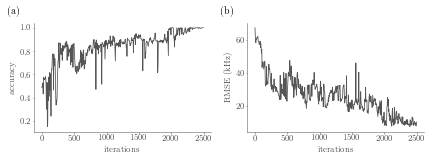

In [6]:
cutoff_acc = accuracy[:2500//5]
cutoff_rmse = rmse[:2500//5]
real_epochs = np.array(range(len(cutoff_acc)))*5
fig1, axes = plt.subplots(ncols=2, figsize=(7,2))
axes[0].plot(real_epochs, cutoff_acc)
axes[0].set_ylabel("accuracy")
#axes[0].set_xlabel("Steps")
axes[1].plot(real_epochs, cutoff_rmse)
axes[1].set_ylabel("RMSE (kHz)")
axes[1].set_xlabel("iterations")
for text, ax in zip(["(a)", "(b)"], axes):
    ax.text(-0.15, 1.15, text, transform=ax.transAxes, va='top',
             fontweight="bold")
    #ax.set_xlim=(0,10)
    ax.set_xlabel("iterations")
#ig1.suptitle("Learning Performance")
plt.subplots_adjust(hspace=0.15)
plt.savefig("circles_learning_performance.pgf", bbox_inches="tight", transparent=True)

plt.savefig("circles_learning_performance.png", bbox_inches="tight", transparent=True)

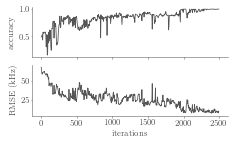

In [11]:
cutoff_acc = accuracy[:2500//5]
cutoff_rmse = rmse[:2500//5]
real_epochs = np.array(range(len(cutoff_acc)))*5
fig1, axes = plt.subplots(nrows=2, figsize=(3.5,2), sharex=True)
axes[0].plot(real_epochs, cutoff_acc)
axes[0].set_ylabel("accuracy")
#axes[0].set_xlabel("Steps")
axes[1].plot(real_epochs, cutoff_rmse)
axes[1].set_ylabel("RMSE (kHz)")
axes[1].set_xlabel("iterations")
#for text, ax in zip(["(a)", "(b)"], axes):
    #    ax.text(-0.15, 1.15, text, transform=ax.transAxes, va='top',
    #             fontweight="bold")
    #ax.set_xlim=(0,10)
axes[1].set_xlabel("iterations")
#ig1.suptitle("Learning Performance")
plt.subplots_adjust(hspace=0.15)
plt.savefig("circles_learning_performance_v2.pgf", bbox_inches="tight", transparent=True)

plt.savefig("circles_learning_performance_v2.png", bbox_inches="tight", transparent=True)

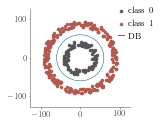

In [10]:
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
colors = ["#555555", "#AF5A50", "#005B82", "#7D966E", "#D7AA50"]
n = 2000
r0 = 15+15
r1 = 30+15

R0 = 80
R1 = 95
p = np.random.randint(-128,127,size=(2,n))
radius = lambda p: np.sqrt(p[0]**2 + p[1]**2)

p_r = p[:, (r0 < radius(p)) & (r1 > radius(p))]
p_R = p[:, (R0 < radius(p)) & (R1 > radius(p))]


plt.figure(figsize=(1.8,1.8))
plt.scatter(*p_r, label="class 0")
plt.scatter(*p_R, label="class 1")
db = mpatches.Circle((0,0), 60,color=colors[2],fill=False, label="decision boundary")
plt.gca().add_artist(db)
plt.xlim(-128,127)
plt.ylim(-128,127)
#plt.xlabel("x")
#plt.ylabel("y")
handles, labels = plt.gca().get_legend_handles_labels()
handles.append(Line2D([0],[0], ls="-", color="#005B82"))
labels.append("DB")
plt.legend(handles, labels, bbox_to_anchor=(.85,1.05))

plt.savefig("circles_task.pgf", bbox_inches="tight", transparent=True)
plt.savefig("circles_task.png", bbox_inches="tight", transparent=True)

In [91]:
plt.close("all")
plt.figure()
plt.plotCircle((0,0), 60, label="decision boundary")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plotCircle'

<Figure size 432x288 with 0 Axes>

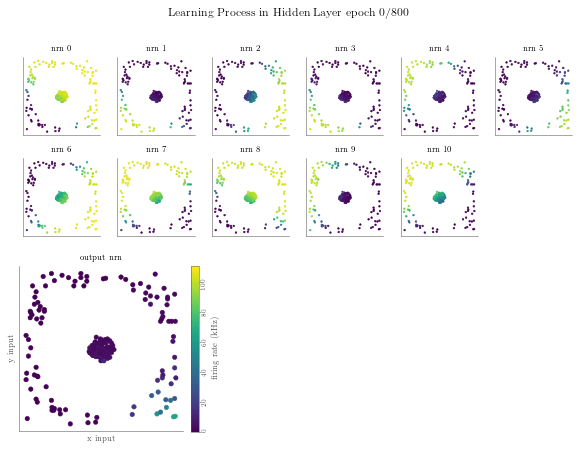

In [77]:
###### general plot settings #######
fig = plt.figure(figsize=(10,7))
shape = (4,6)
wcolor = "grey"
grid = gs.GridSpec(*shape, wspace=0.1, hspace=0.3)

def replot_weights(fig, weights, ax_idx=13):
    fig.axes[ax_idx].patches = []
    fig.axes[ax_idx].bar(np.arange(n_h_nrns), weights, width, color=wcolor, label="weight")


def replot_fire_rate(fig, points, rates, n_nrns, l_step):
    for i in range(n_nrns):
        fig.axes[i].collections = []
        s = 3 if i < 11 else 20
        fig.axes[i].scatter(points[:,0], points[:,1], c=rates[:,i], s=s,
                vmin=VMIN, vmax=VMAX)
    
    fig.suptitle("Learning Process in Hidden Layer epoch {}/{}".format(l_step, learning_steps))
    fig.canvas.draw()

########## INIT FIRE RATE PLOT ###############
# data
rates = rates_storage[0]
points = points_storage[0]

for i in range(n_nrns):
    if i < (n_nrns-1):
        ax = fig.add_subplot(grid[np.int(i/6),i%6])
        title = "nrn {}".format(i)
        s = 3
    else:
        ax = fig.add_subplot(grid[2:,0:2])
        title = "output nrn"
        s = 20
        ax.set_ylabel("y input")
        ax.set_xlabel("x input")
    ax.set_title(title)
    ax.set_aspect(1.0)

    ax.set_xticks([])
    ax.set_yticks([])
    sc = ax.scatter(points[:,0], points[:,1], c=rates[:,i], s=s,
                    vmin=VMIN, vmax=VMAX)
    #ax.tick_params(axis='both', which='minor', labelsize=6)
    
    if i == 11:
        cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="firing rate (kHz)")
        cbar.ax.tick_params(labelsize=6, rotation = 90)
    fig.suptitle("Learning Process in Hidden Layer epoch {}/{}".format(0, learning_steps))
    fig.canvas.draw()
    


In [ ]:
######### INIT WEIGHTS PLOT ###################
ax = fig.add_subplot(grid[2:,3:])
weights = weights_out_storage[0]
width = 0.8
ymax_w = np.amax(weights_out_storage)+2
ymin_w = np.amin(weights_out_storage)+2
n_h_nrns = weights.shape[0]
ax.set_aspect(.3)
ax.set_xlabel("hidden nrns")
ax.set_xticks(list(range(n_h_nrns)))
ax.set_ylabel("weights")
ax.set_ylim(ymin_w, ymax_w)
ax.set_title("hidden -> out weights")
ax.bar(np.arange(n_h_nrns), weights, width, color=wcolor, label="weight")
    
############# LOOP THE REST ###################
for l_step in range(1,800, 1):
    rates = rates_storage[l_step]
    points = points_storage[l_step]
    replot_fire_rate(fig, points, rates, n_nrns, l_step)
    
    weights = weights_out_storage[l_step]
    replot_weights(fig, weights, ax_idx=12+1)

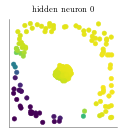

In [78]:
l_step = 1
rates = rates_storage[l_step]
points = points_storage[l_step]
s = 20
for i in range(1):
    fig = plt.figure(figsize=(2,2))
    plt.scatter(points[:,0], points[:,1], c=rates[:,i], s=s,
                    vmin=VMIN, vmax=VMAX)
    plt.xticks([])
    plt.yticks([])
    plt.title("hidden neuron {}".format(i))
    plt.axis('square')
    plt.savefig("h_neuron_{}_{}.png".format(l_step, i), bbox_inches="tight")

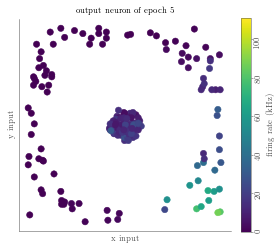

In [97]:
l_step = 1
rates = rates_storage[l_step]
points = points_storage[l_step]

fig = plt.figure(figsize=(4,4))
sc = plt.scatter(points[:,0], points[:,1], c=rates[:,11], s=40,
                vmin=VMIN, vmax=VMAX)
cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="firing rate (kHz)")
cbar.ax.tick_params(rotation = 90)
plt.xticks([])
plt.yticks([])
plt.ylabel("y input")
plt.xlabel("x input")
plt.title("output neuron of epoch {}".format(l_step*5))
plt.axis('square')
plt.tight_layout()
plt.savefig("output_neuron_{}.png".format(l_step*5))

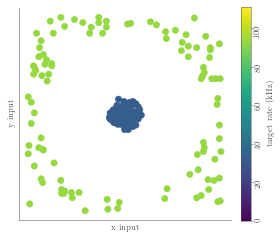

In [98]:
fig = plt.figure(figsize=(4,4))
sc = plt.scatter(points[:,0], points[:,1], c=targets[0,:], s=40,
                vmin=VMIN, vmax=VMAX)
cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="target rate (kHz)")
cbar.ax.tick_params(rotation = 90)
plt.xticks([])
plt.yticks([])
plt.ylabel("y input")
plt.xlabel("x input")
plt.axis('square')
plt.tight_layout()
plt.savefig("targets.png", bbox_inches="tight", transparent = True) 

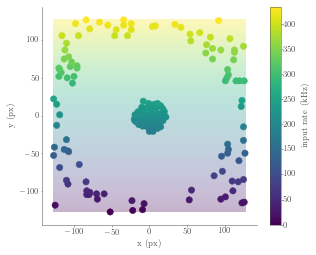

In [99]:
def points_to_rates(points):
    input_rate = 500/2.3
    rates = input_rate*((128 + points[:,:2])/128)
    return rates

input_rates = points_to_rates(points)
d_input_points = 10
map_points = np.vstack([np.arange(-128,127,d_input_points), np.arange(-128,127,d_input_points)]).T
input_rates_map = points_to_rates(map_points)
VMIN_INPUT = np.amin(input_rates)
VMAX_INPUT = np.amax(input_rates)

fig = plt.figure()
image = np.arange(65536).reshape((256, 256))
im = plt.imshow(image, origin='lower', alpha=0.3, extent=[-128, 127, -128, 127])
plt.xlabel("x (px)")
plt.ylabel("y (px)")
sc = plt.scatter(points[:,0],points[:,1], c=input_rates[:,1], s=40,
                vmin=VMIN_INPUT, vmax=VMAX_INPUT)

cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="input rate (kHz)")
plt.savefig("input_y_map.png", bbox_inches="tight")

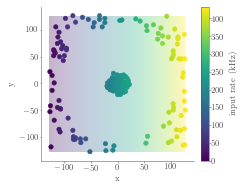

In [95]:
fig = plt.figure(figsize=(3,3))
image = np.arange(65536).reshape((256, 256)).T
im = plt.imshow(image, origin='middle', alpha=0.3, extent=[-128, 127, -128, 127])
plt.xlabel("x")
plt.ylabel("y")
sc = plt.scatter(points[:,0], points[:,1], c=input_rates[:,0], s=20,
                vmin=VMIN_INPUT, vmax=VMAX_INPUT)

cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="input rate (kHz)")
plt.savefig("input_x_map.png", bbox_inches="tight")

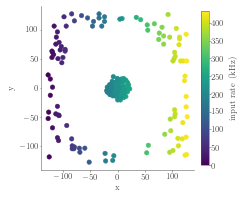

In [93]:
fig = plt.figure(figsize=(3,3))
sc = plt.scatter(points[:,0], points[:,1], c=input_rates[:,0], s=20,
                vmin=VMIN_INPUT, vmax=VMAX_INPUT)
plt.xlabel("x")
plt.ylabel("y")
cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="input rate (kHz)")

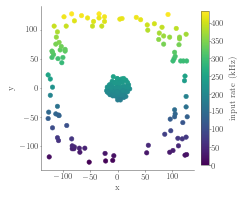

In [94]:
fig = plt.figure(figsize=(3,3))
sc = plt.scatter(points[:,0], points[:,1], c=input_rates[:,1], s=20,
                vmin=VMIN_INPUT, vmax=VMAX_INPUT)
plt.xlabel("x")
plt.ylabel("y")
cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="input rate (kHz)")

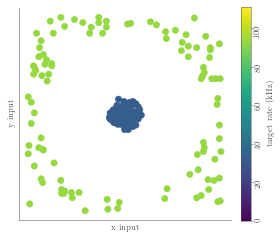

In [96]:
fig = plt.figure(figsize=(4,4))
sc = plt.scatter(points[:,0], points[:,1], c=targets[0,:], s=20,
                vmin=VMIN, vmax=VMAX)
cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="target rate (kHz)")
cbar.ax.tick_params(rotation = 90)
plt.xticks([])
plt.yticks([])
plt.ylabel("y input")
plt.xlabel("x input")
plt.axis('square')
plt.tight_layout()
plt.savefig("targets.png", bbox_inches="tight", transparent = True) 

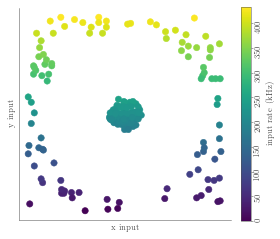

In [83]:
fig = plt.figure(figsize=(4,4))
sc = plt.scatter(points[:,0], points[:,1], c=input_rates[:,1], s=40,
                vmin=VMIN_INPUT, vmax=VMAX_INPUT)
cbar = fig.colorbar(sc, fraction=0.046, pad=0.04, label="input rate (kHz)")
cbar.ax.tick_params(rotation = 90)
plt.xticks([])
plt.yticks([])
plt.ylabel("y input")
plt.xlabel("x input")
plt.axis('square')
plt.tight_layout()